In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal,ndimage 
import math

# LAB 7 - Convolution and Deconvolution

## DUE: 1 March 2024 @ 11.59pm

## NAME: Anastasia Horne $\hspace{2.5in}$                                 STUDENT NUMBER: 10867499 

The purpose of this lab is to give you additional practice with 1D/2D convolution and 1D deconvolution.  

Note: You must show your numerical work, and your computations must be reproducible either as a number of short python codes or (preferrably) in a single Jupyter Notebook! **Please include a PDF version of your assignment to help the TA with the grading process.**

# Question 1 - 1D Deconvolution

Last week's lab examined **time-domain convolution** of wavelets of different central frequencies, $h_{10}(t)$, $h_{40}(t)$ and $h_{70}(t)$, with a reflectivity sequence $x(t)$. We used a Ricker wavelet defined by:

$$ R(t) = \frac{2}{\pi^{1/4}\sqrt{3a}} \left(1 - \frac{t^2}{a^2}\right) e^{-t^2/2 a^2}, \tag{1}$$

where $a$ is the parameter that effectively controls the frequency content.  We generated these wavelets numerically using 

    ricker = signal.ricker(nt,a) 

where $nt$ is the number of time samples and $a$ is the parameter you used to calibrate the wavelet center frequency in equation 1. 

In this problem we are going to try to "undo" the convolution we performed using the principles of **deconvolution with a known wavelet**.

### Fourier-domain Deconvolution

From the convolution theorem we know for a convolutional system $y(t) = x(t)\ast h(t)$ that the following is true:

$$ \widehat{Y}(\omega) = \widehat{H}(\omega)\widehat{X}(\omega). \tag{2} $$

Thus, one might expect that the optimal solution to recover the input reflectivity sequence from $y(t)$ would be through $\widehat{X}(\omega) = \frac{\widehat{Y}(\omega)}{\widehat{H}(\omega)}$.  However, this does not lead to a stable output because the spectrum of $\widehat{H}(\omega)$ commonly contains zeros, which would lead to zero division.  Thus, we need to find an alternative approach.

### Least-squares solution approach

One way that we can stabilize the problem is to solve a **least-squares damped system**.  To understand why, let's first look at a least-squares function $q(x)$ that we would like to minimize with respect to the desired deconvolved model parameter $x$: 

$$q(x) = \frac{1}{2}(hx-y)^2. \tag{3}$$

Minimizing this expression requires setting the first derivative of $q$ with respect to $x$ to zero:

$$0 = \frac{\partial q}{\partial x} = h(hx-y), \tag{4}$$

or, solving for $x$:

$$ x = \frac{h y}{h^2}=\frac{y}{h}, \tag{5}$$

which essentially recovers the initial estimate (that we know doesn't work)! Let's look at defining a new least-squares function $q(x)$ that can help us by adding in a **damping term**:

$$q(x) = \frac{1}{2}[(hx-y)^2 + \epsilon^2 x^2], \tag{6}$$

where $\epsilon^2$ is a small real positive number. Essentially, the second term prevents $q$ from being zero in scenarios where $h=0$.  Let's again minimize the first derivative of $q(x)$ with respect to $x$:

$$0 = \frac{\partial q}{\partial x} = h(hx-y)+\epsilon^2 x. \tag{7}$$

Solving this system for $x$ leads to the following expression:

$$\tilde{x} = \frac{h y}{h^2+\epsilon^2}. \tag{8}$$

where the tilde indicates an estimate.  Note that even a small $\epsilon$ guarantees that when $h=0$ that there will be a small positive value in the denominator and thus no zero division.

### Least-squares solution approach (complex number)

Wait a minute! Aren't spectra complex numbers? Yes, so you have to take this into account when you develop the least-squares solution for $Q(\overline{X},X)$, where I will drop the frequency-domain "widehats" for notational convenience:

$$Q(\overline{X},X) = (\overline{H} \overline{X} − \overline{Y})(HX-Y) + \epsilon^2\overline{X}X, \tag{9}$$

where the overline indicates complex conjugate.  Let's minimize this least-square function $Q(\overline{X},X)$ with respect to $\overline{X}$:

$$0 = \frac{\partial Q}{\partial \overline{X}} = \overline{H}(HX-Y)+\epsilon^2 X.  \tag{10}$$

Solving for $X$ leads to the following least-squares estimate $\tilde{X}$ of $X$:

$$\tilde{X} = \frac{ \overline{H}Y}{\overline{H}H+\epsilon^2}, \tag{11}$$

where the tilde emphasizes *estimate*.  Again, the presence of $\epsilon^2$ helps to prevent division by zero.  The positive thing about this approach is that one can apply deconvolution in the Fourier domain in a fairly straightforward fashion.  The downside is that choosing $\epsilon^2$ generally requires a trial-and-error approach to determine a "good" value. 

### Your assignment

Let's look at the 1D reflectivity function that we defined above.  I reproduce it here for completeness:

C:\Users\anast\AppData\Local\Temp\ipykernel_129320\819963294.py:8: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  refl = ndimage.filters.gaussian_filter1d(np.random.randn(nt)**tpow,gsmooth)/rescale


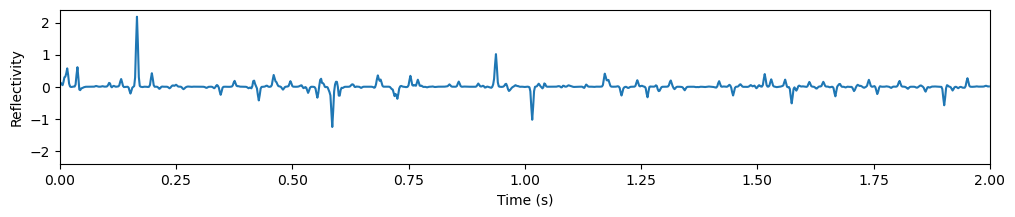

In [2]:
# . . Reflectivity parameters
nt,dt,tpow,gsmooth,rescale=1000,0.002,5,1,100

# . . Time line
t = np.arange(0,nt,1)*dt

# . . Reflectivity function x(t)
refl = ndimage.filters.gaussian_filter1d(np.random.randn(nt)**tpow,gsmooth)/rescale

# . . Plot of Reflectivity
plt.figure(figsize=(12, 2))
plt.plot(t,refl)
plt.xlabel('Time (s)')
plt.ylabel('Reflectivity')
plt.axis([0,2,-1.1*np.max(np.abs(refl)),1.1*np.max(np.abs(refl))])
plt.show()

(1-1) Copy over your 40Hz and 70Hz Ricker wavelets, $h_{40}(t)$ and $h_{70}(t)$, from last week's lab. Using the 40Hz wavelet, compute the 1D convolution with the reflectivity sequence, $x(t)$, defined in the cell above to get the convolved output, $y_{40}(t)$.

In [3]:
# . . Your answer to question 1-1 goes here
h40=signal.ricker(nt,2.8)
h70=signal.ricker(nt,1.62)
y40=np.convolve(h40, refl, mode='same')

(1-2) Compute Fourier transforms of $y_{40}(t)$ and $h_{40}(t)$. 

You'll note that the Ricker wavelet does not appear right at the start of the time series, but is located right in the middle.  Let's alter the location of the Ricker wavelet by applying a phase shift in the Fourier domain.  To do this, make sure that you multiply your Fourier transformed wavelet $\widehat{H_{40}}(\omega)$ by $e^{i\pi f T}$, where $f$ is computed using `np.fft.fftfreq(nt,dt)` and $T$ is the trace length.

Perform the deconvolution operation as per equation 11 above using $\widehat{H_{40}}(\omega)$ and $\widehat{Y_{40}}(\omega)$ to obtain $\widehat{\tilde{X_{40}}}(\omega)$ (choose an initial value of $\epsilon$ ... usually very small!). Then, inverse Fourier transform the result back to the time domain to obtain $\tilde{x_{40}}(t)$.  You will have to adjust your choice $\epsilon$ until you achieve a satisfactory deconvolution result. 

Create three subplots of the: (a) original reflectivity function $x(t)$ (i.e., *refl*); (b) convolution of $h_{40}(t)\ast x(t)$; and (c) deconvolved estimate $\tilde{x_{40}}(t)$. Also include three subplots of their associated Fourier-domain spectra.

C:\Users\anast\anaconda3\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\anast\anaconda3\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, 'Deconvolved Fourier')

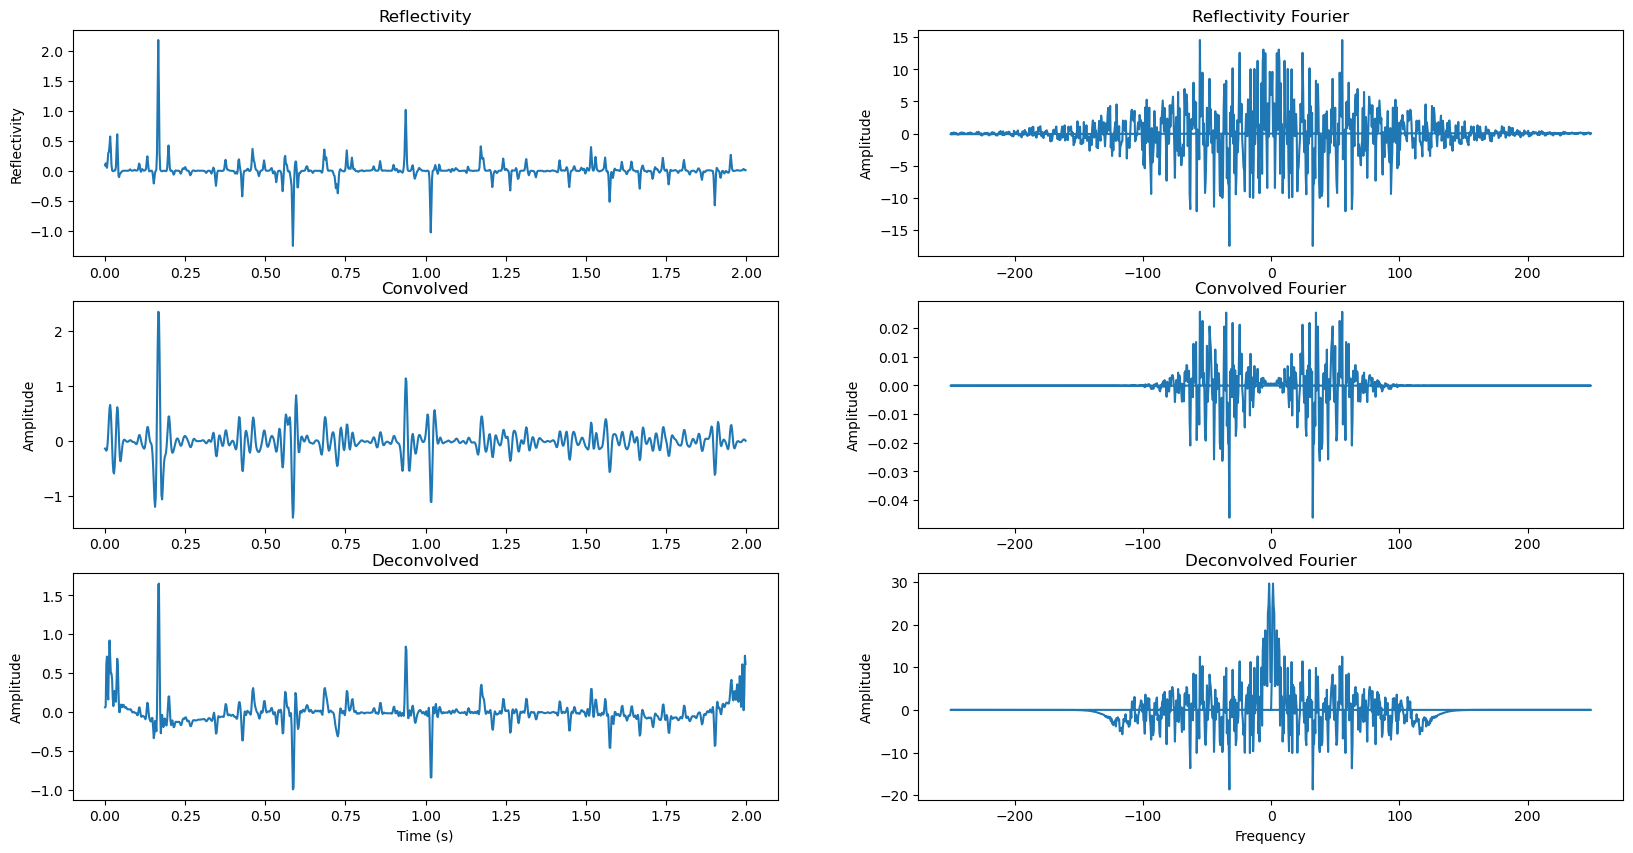

In [4]:
# . . Your answer to question 1-2 goes here
f=np.fft.fftfreq(nt,dt)
H_hat=np.fft.fft(h40)/nt
T=np.max(t)-np.min(t)
H40=H_hat * np.exp(np.pi * f * T*1j)
Y40=np.fft.fft(y40)/nt
e=0.00001
X40=(np.conj(H40)*Y40)/(np.conj(H40)*H40+e**2)
x40=np.fft.ifft(X40)

#TO DO: add titles to plots
#plots
fig, axs = plt.subplots(3, 2, figsize=(20, 10))
axs[0,0].set_title('Reflectivity')
axs[0,0].plot(t, refl)
axs[0,0].set_ylabel('Reflectivity')
axs[0,1].set_title('Reflectivity Fourier')
axs[0,1].plot(f, np.fft.fft(refl))
axs[0,1].set_ylabel("Amplitude")

axs[1,0].set_title('Convolved')
axs[1,0].plot(t, y40)
axs[1,0].set_ylabel('Amplitude')
axs[1,1].plot(f, Y40)
axs[1,1].set_ylabel("Amplitude")
axs[1,1].set_title('Convolved Fourier')

axs[2,0].plot(t, x40)
axs[2,0].set_title('Deconvolved')
axs[2,0].set_xlabel('Time (s)')
axs[2,0].set_ylabel('Amplitude')
axs[2,1].plot(f, np.fft.fft(x40))
axs[2,1].set_ylabel("Amplitude")
axs[2,1].set_xlabel('Frequency')
axs[2,1].set_title('Deconvolved Fourier')



(1-3) Comment on how well your $\tilde{x_{40}}(t)$ resembles the original $x(t)$. 

The $\tilde{x_{40}}(t)$ seems to resemble our original relflectivity equation well at all times except the very beginning and end of the signal. We see that $\tilde{x_{40}}(t)$ has a negative peak of similar magnitude and time to the largest negative peak in refl. Furthermore, most of the spikes/peaks in the refl plot are represented accurately in our deconvoluted plot.   

(1-4) Comment on how your choice of $\epsilon$ affects the deconvolution result.

The choice of epsilon determines how much smoothing occurs during our deconvolution. If we increase $\epsilon$ then our denominator becomes larger and our resultant signal becomes smoother. Additionaly the larger our $\epsilon$ value, the closer our $\tilde{x_{40}}(t)$ signal relates/looks like our convoluted signal. 

# Question 2 - Convolutional Modeling (Tuning effects)

This question looks at 1D convolution (in times) with a Ricker wavelet for a 2D **wedge** or **thin-bed** reflectivity model consisting of one flat layer and one dipping layer that intersect at the edge of the model.  The two reflectors are of equal reflectivity.  The geometry of this model is illustrated in the figure below.

<img src="Fig/wedge2.png" width="800">

### Your Assignment:

(2-1) Recreate the Wedge Model by filling in the statements to define 2D model matrix RRR in the section below. (Note: If you add a line that doesn't apear to plot you could be "screen aliased". If this is the case try making the figure larger!)

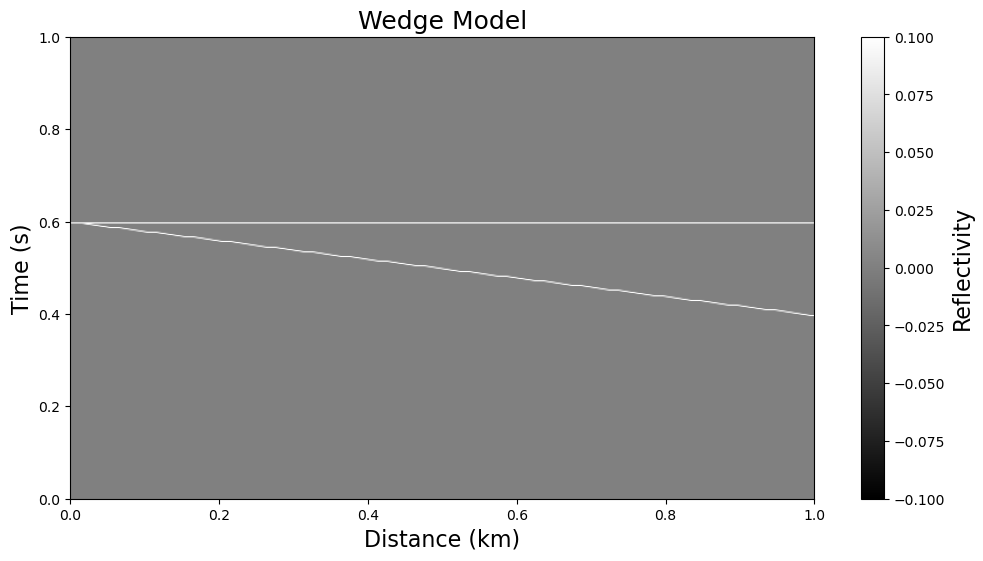

In [5]:
# . . Time and space input parameters
nt,dt=400,0.0025
nx,dx=100,0.01

# . . Create model
RRR = np.zeros((nt,nx))

##############################
# . . Insert commands to remake
# . . the reflectivity model in 
# . . the figure above
#this is the closest I could get it
RRR[161]= 0.1
start=(161, 0)
end=(241, 99)
Dx = end[0] - start[0]
Dt = end[1] - start[1]

for i in range(100):
    x = start[0] + i * Dx // 99
    t = start[1] + i * Dt // 99
    RRR[x][t] =0.1


##############################
steps=99
plt.figure(figsize=(12, 6))
plt.imshow(RRR,aspect='auto',cmap='gray',vmin=-0.1, vmax=0.1,extent=[0,400*dt,0,1])
plt.xlabel('Distance (km)',fontsize=16)
plt.ylabel('Time (s)',fontsize=16)
plt.title('Wedge Model',fontsize=18)
cbar = plt.colorbar()
cbar.set_label('Reflectivity', rotation=90,fontsize=16)

plt.show()

(2-2) Given the number of time samples, $nt$, and temporal sampling interval, $dt$, defined above, create two Ricker wavelets using values of $a=5$ and $a=20$. Perform **1D convolution** of your wavelets with your reflectivity from (2-1) **at each horizontal x location**. (For example you could write a loop over the x index.)  Produce two separate plots showing the output of the wavelet-model convolution.

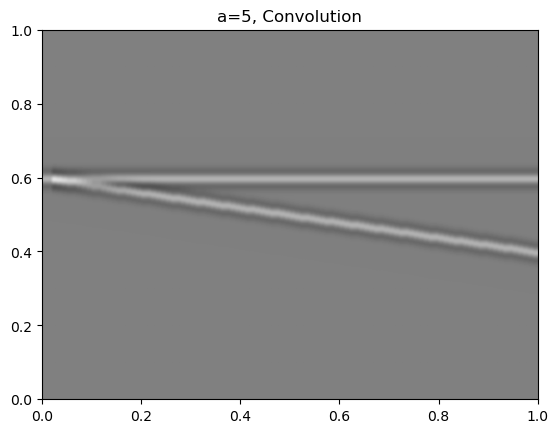

100


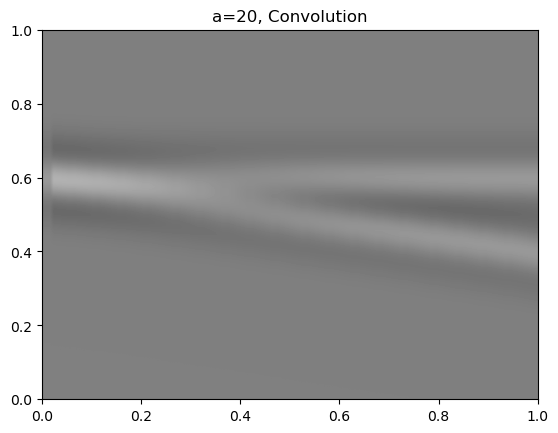

In [6]:
# . . You answer to question 2-2 goes here
t = np.arange(0,nt,1)*dt

a5= signal.ricker(nt,5)

RRR5=np.zeros((nt,nx))
for x in range(RRR5.shape[1]):
    refl = RRR[:, x]
    y5 = np.convolve(refl, a5, mode='same')
    RRR5[:,x]=y5
plt.imshow(RRR5,aspect='auto',cmap='gray',vmin=-0.1, vmax=0.1,extent=[0,400*dt,0,1])
plt.title("a=5, Convolution")
plt.show()

#a=20
a20= signal.ricker(nt,20)
RRR20=np.zeros((nt,nx))
print(RRR20.shape[1])
for x in range(RRR20.shape[1]):
    refl = RRR[:, x]
    y20 = np.convolve(refl, a20, mode='same')
    RRR20[:, x]=y20
plt.imshow(RRR20,aspect='auto',cmap='gray',vmin=-0.1, vmax=0.1,extent=[0,400*dt,0,1])
plt.title("a=20, Convolution")
plt.show()

(2-3) Extract the amplitudes along the flat reflector for both convolved models. Plot these over top of each other.

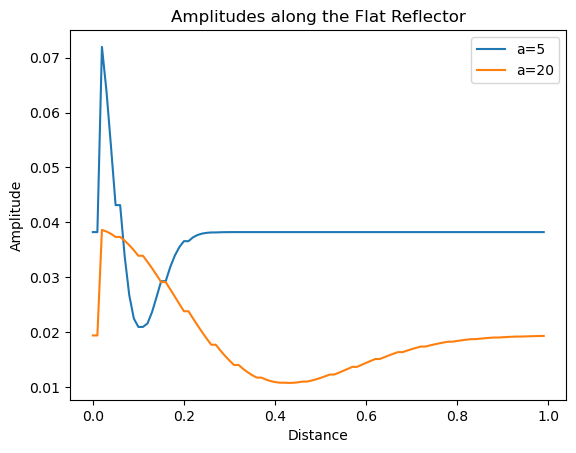

In [7]:
# . . Your answer to question 2-3 goes here
amplitude_5 = RRR5[161]
amplitude_20 = RRR20[161]

x=np.arange(0,1,.01)
plt.plot(x, amplitude_5, label='a=5')
plt.plot(x, amplitude_20, label='a=20')
plt.title('Amplitudes along the Flat Reflector')
plt.xlabel('Distance')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

(2-4) What is happening to the amplitudes to the left-hand side of the output compared to the right-hand side? At what distances along the model can you no longer distinguish two independent reflectors?

Overall the left-hand side of the output of both curves sees jumps and changes within our amplitude, while the right hand side shows each curve reaching a constant value and converging. At approximately $x=0.05$ and $x=0.15$, we see that our curves intersect, and during these points we cannot distinguish the reflectors.  

# Question 3 - Thin-bed Deconvolution

In Question 1 we investigated how to deconvolve out a known wavelet from convolved function. In question 2 we generated an interesting 2D thin-bed model again by convolving a known Ricker wavelet. Let's now combine these concepts to see how well we can improve resolution of our thin beds using deconvolution. 

### Your assignment:

(3-1) Starting with the Question 2 result formed from convolving the Ricker wavelet defined by $a=5$, apply the **1D deconvolution** procedure from Question 1 above to each horizontal location (or trace).   

C:\Users\anast\AppData\Local\Temp\ipykernel_129320\524555867.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  DeconvRRR5[:,x]=x5


Text(0, 0.5, 'Time')

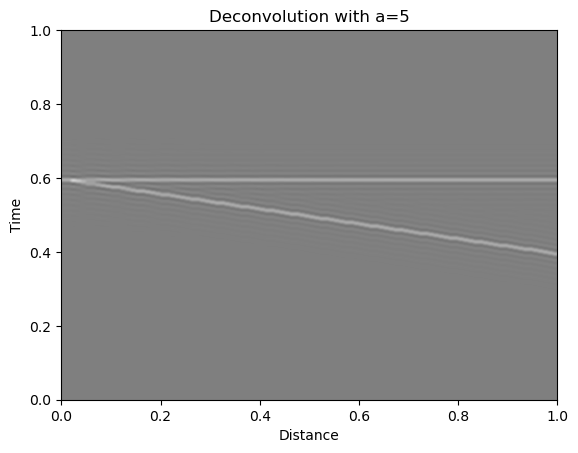

In [8]:
# . . Your answer to question 3-1 goes here
#convolved signal is RRR5, original signal is RRR, ricker wavelet is a5
a5= signal.ricker(nt,5)
f=np.fft.fftfreq(nt,dt)
a5_hat=np.fft.fft(a5)/nt
T=np.max(t)-np.min(t)
A5=a5_hat*np.exp(np.pi * f * T*1j)
DeconvRRR5=np.zeros((nt,nx))
for x in range(RRR5.shape[1]):
    conv = RRR5[:, x]
    fft=np.fft.fft(conv)/nt
    e=0.0000001
    X5=(np.conj(A5)*fft)/(np.conj(A5)*A5+e**2)
    x5=np.fft.ifft(X5)
    DeconvRRR5[:,x]=x5
plt.imshow(DeconvRRR5,aspect='auto',cmap='gray',vmin=-0.1, vmax=0.1,extent=[0,400*dt,0,1])
plt.title("Deconvolution with a=5")
plt.xlabel("Distance")
plt.ylabel("Time")

(3-2) Comment your how the quality of your deconvolution results change with the thin-bed thickness (i.e., from left to right).

The deconvolution results do not seem to change much as we move left to right. I do notice the 'riples' around our to reflectors, and from what I can tell, they might expand as our bed thickness increases. 

(3-3) Repeat your analysis from (3-1) of this question using your results from Question 2 formed by convolving the Ricker wavelet defined by $a=20$.

C:\Users\anast\AppData\Local\Temp\ipykernel_129320\3972760051.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  DeconvRRR20[:,x]=x20


Text(0, 0.5, 'Time')

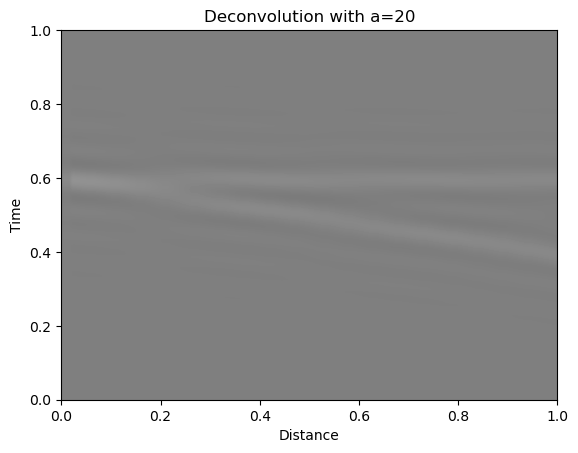

In [9]:
# . . Your answer to question 3-3 goes here
a20= signal.ricker(nt,20)
f=np.fft.fftfreq(nt,dt)
a20_hat=np.fft.fft(a20)/nt
T=np.max(t)-np.min(t)
A20=a20_hat*np.exp(np.pi * f * T*1j)
DeconvRRR20=np.zeros((nt,nx))
for x in range(RRR20.shape[1]):
    conv = RRR20[:, x]
    fft=np.fft.fft(conv)/nt
    e=0.00001
    X20=(np.conj(A20)*fft)/(np.conj(A20)*A20+e**2)
    x20=np.fft.ifft(X20)
    DeconvRRR20[:,x]=x20
plt.imshow(DeconvRRR20,aspect='auto',cmap='gray',vmin=-0.1, vmax=0.1,extent=[0,400*dt,0,1])
plt.title("Deconvolution with a=20")
plt.xlabel("Distance")
plt.ylabel("Time")

(3-4) Comment on how your result from (3-3) is different than from (3-1).  Comment on how this would affect the vertical resolution of seismic images.

We see that the deconvoluted image for $a=20$ is much more blurry than the image in the previous part. This means our seismic images would be more smoothed if we convolved them with a ricker wavelet with a higher $a$ value. What both of these statements mean is our convolution was succesful in suppressing/dispersing the higher frequency values in our signal.